Clustering clusters. There's a lot of clustering algos. Most of them cluster data by using Euclidean distance as a measure.

 • k-means is an algorithm that first picks a random position (centroid) for each cluster (you have to pre-define the number of clusters) and then recalculates the groups' center points iteratively, based on means, until they converge. Outliers and where the first centroid lands can be a problem.

 • PAM (Partitioning Around Medoids) doesn't use centroids, but medoids, which are actual data points in the clusters. Instead of first picking a random position, we pick a random data point, then calculate the distance (error) from all the other data points iteratively until the errors are minimized. This avoids the problem with outliers.

 • DBSCAN (Density-Based Spatial Clustering of Applications with Noise) infers the appropriate number of clusters based on our data for us, and clusters based on density rather than distance. It identifies core points with a minimum number of "neighbors" within a specified radius (epsilon). Clusters are formed by connecting core points to their neighbors.

# Extraction, first look

pairs() is useful for visualizing a pairwise correlation plot of a given attribute. In this case, we'll be comparing the three different species:

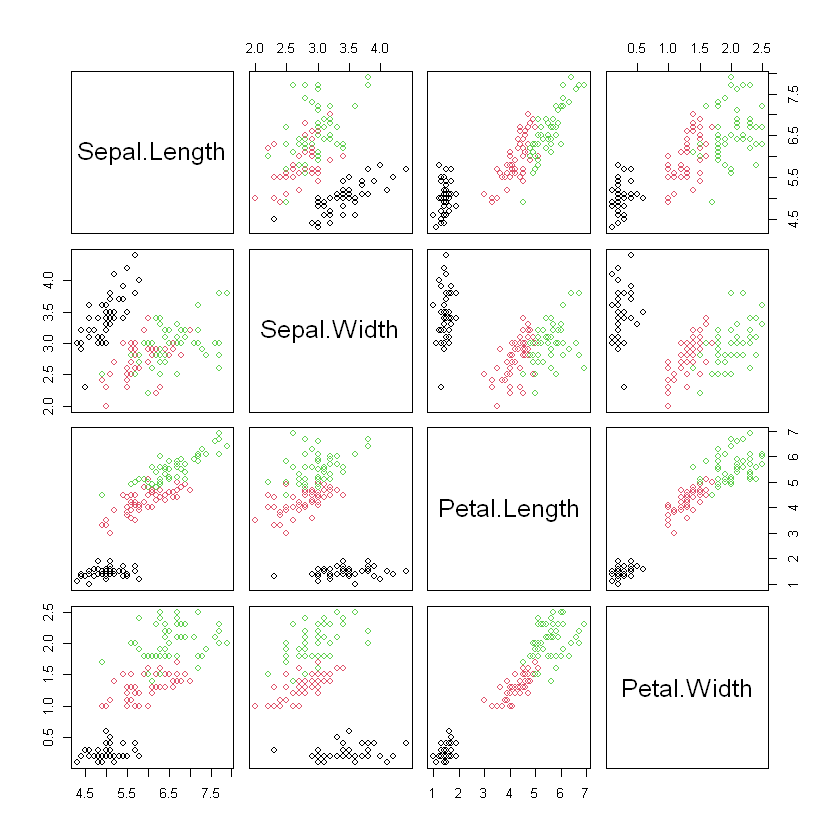

In [2]:
library(clue)

# 1. Load iris and show summary:
data(iris)
pairs(iris[,1:4], col=iris$Species)

# Transformation, application of k-means

In [5]:
# 2. Cluster original iris dataset
km3 = kmeans(iris[,1:4],3,100)
iris$KM3 = km3$cluster

# 3. Calculate PCA of dataset
irpc = prcomp(iris[,1:4])$x
# Keep as many PCs as you want (2 in our case)
ir12 = irpc[,1:2] 

# 4. Apply k-means on PCs
pckm3 = kmeans(ir12, 3, iter.max=100)$cluster
iris$PCKM3 = pckm3

# 5. Compare results
# 5.1 With Species (class labels)
t1 = table(iris$Species, iris$KM3)

maximise_diag <- function(mat) {
  if (class(mat) == "table") {
    mat <- as.matrix(mat)
  }
  cost_matrix <- max(mat) - mat
    permutation <- solve_LSAP(cost_matrix)
    reordered_mat <- mat[, permutation]
  return(reordered_mat)
}

# Let's output it like a confusion matrix:
res_1 <- maximise_diag(t1)
res_1

# Accuracy
accuracy_1 <- sum(diag(res_1)) / sum(res_1)
print(paste("Accuracy:", round(accuracy_1, 4)))

# PCA'd version
t2 = table(iris$Species, iris$PCKM3)
res_2 = maximise_diag(t2)

accuracy_2 <- sum(diag(res_2)) / sum(res_2)
print(paste("Accuracy:", round(accuracy_2, 4)))

            
              3  1  2
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

[1] "Accuracy: 0.8933"
[1] "Accuracy: 0.8867"


Nearly the same accuracy with only 2 dimensions!